In [40]:
!pip install selenium

In [41]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [42]:
iphone_14=[]

In [43]:
for i in range(1,41):
    ip=[]
    url="https://www.amazon.in/Apple-iPhone-Pro-Deep-Purple/product-reviews/B0BDK64JGN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        ip.append(reviews[i].text)
    iphone_14=iphone_14+ip

In [44]:
iphone_14

['\nThe Good: The software is extremely smooth and stable. Battery life is good and not too exceptional. It’s certainly not as good as 13 Pro Max. The battery is currently lasting me 24 hours instead of 18 hours on my Android. I’d say the 3200mAh from Apple is comparable to a 5500mAh Android battery. The 48MP camera is sharp and fast. The dynamic island is extremely helpful in many situations that involve multitasking. I use it very frequently during calls. The screen is bright and looks very clear even in direct sunlight. Haptics are very unique and delightful. Face id is much easier than a fingerprint scanner. Gone are the days of wiping your fingers. The Safari password manager can save passwords for all sites and authenticate directly with Face Id. The size of the phone 6.1 inch is very comfortable for one hand use and one needn’t shuffle around the phone for one hand use like on 6.7 inch phones.Where Apple really shines is with the ecosystem. My 14 Pro, Series 8 watch and Airpods 

In [162]:
import pandas as pd

In [163]:
review=pd.DataFrame({'review':iphone_14})
review

,review
0,\nThe Good: The software is extremely smooth a...
1,"\nAs a Techie, I couldn't resist the latest Te..."
2,\nAll good but the picture quality gets worse ...
3,\nI was in doubt before investing such a huge ...
4,\nI think battery should be better\n
...,...
215,\nI have purchased it on 9 Nov 22 and got it o...
216,"\nBattery life, design & great looks\n"
217,\nIphone is just amazing.....and I just love t...
218,


In [164]:
def clean_text(text):
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    return text

In [165]:
review['removed_punc']=review['review'].apply(clean_text)
review

,review,removed_punc
0,\nThe Good: The software is extremely smooth a...,The Good The software is extremely smooth and ...
1,"\nAs a Techie, I couldn't resist the latest Te...",As a Techie I couldnt resist the latest Techno...
2,\nAll good but the picture quality gets worse ...,All good but the picture quality gets worse af...
3,\nI was in doubt before investing such a huge ...,I was in doubt before investing such a huge am...
4,\nI think battery should be better\n,I think battery should be better
...,...,...
215,\nI have purchased it on 9 Nov 22 and got it o...,I have purchased it on 9 Nov 22 and got it on ...
216,"\nBattery life, design & great looks\n",Battery life design great looks
217,\nIphone is just amazing.....and I just love t...,Iphone is just amazingand I just love the batt...
218,,


In [166]:
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

In [167]:
review['removed_num']=review['removed_punc'].apply(remove_numbers)
review

,review,removed_punc,removed_num
0,\nThe Good: The software is extremely smooth a...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...
1,"\nAs a Techie, I couldn't resist the latest Te...",As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...
2,\nAll good but the picture quality gets worse ...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...
3,\nI was in doubt before investing such a huge ...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...
4,\nI think battery should be better\n,I think battery should be better,I think battery should be better
...,...,...,...
215,\nI have purchased it on 9 Nov 22 and got it o...,I have purchased it on 9 Nov 22 and got it on ...,I have purchased it on Nov and got it on th ...
216,"\nBattery life, design & great looks\n",Battery life design great looks,Battery life design great looks
217,\nIphone is just amazing.....and I just love t...,Iphone is just amazingand I just love the batt...,Iphone is just amazingand I just love the batt...
218,,,


In [168]:
# remove emojis

In [169]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [170]:
review['removed_emojis']=review['removed_num'].apply(remove_emoji)
review

,review,removed_punc,removed_num,removed_emojis
0,\nThe Good: The software is extremely smooth a...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...
1,"\nAs a Techie, I couldn't resist the latest Te...",As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...
2,\nAll good but the picture quality gets worse ...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...
3,\nI was in doubt before investing such a huge ...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...
4,\nI think battery should be better\n,I think battery should be better,I think battery should be better,I think battery should be better
...,...,...,...,...
215,\nI have purchased it on 9 Nov 22 and got it o...,I have purchased it on 9 Nov 22 and got it on ...,I have purchased it on Nov and got it on th ...,I have purchased it on Nov and got it on th ...
216,"\nBattery life, design & great looks\n",Battery life design great looks,Battery life design great looks,Battery life design great looks
217,\nIphone is just amazing.....and I just love t...,Iphone is just amazingand I just love the batt...,Iphone is just amazingand I just love the batt...,Iphone is just amazingand I just love the batt...
218,,,,


In [171]:
review['Lower_text']=review['removed_emojis'].map(lambda x: x.lower())
review

,review,removed_punc,removed_num,removed_emojis,Lower_text
0,\nThe Good: The software is extremely smooth a...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...,the good the software is extremely smooth and ...
1,"\nAs a Techie, I couldn't resist the latest Te...",As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...,as a techie i couldnt resist the latest techno...
2,\nAll good but the picture quality gets worse ...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...,all good but the picture quality gets worse af...
3,\nI was in doubt before investing such a huge ...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...,i was in doubt before investing such a huge am...
4,\nI think battery should be better\n,I think battery should be better,I think battery should be better,I think battery should be better,i think battery should be better
...,...,...,...,...,...
215,\nI have purchased it on 9 Nov 22 and got it o...,I have purchased it on 9 Nov 22 and got it on ...,I have purchased it on Nov and got it on th ...,I have purchased it on Nov and got it on th ...,i have purchased it on nov and got it on th ...
216,"\nBattery life, design & great looks\n",Battery life design great looks,Battery life design great looks,Battery life design great looks,battery life design great looks
217,\nIphone is just amazing.....and I just love t...,Iphone is just amazingand I just love the batt...,Iphone is just amazingand I just love the batt...,Iphone is just amazingand I just love the batt...,iphone is just amazingand i just love the batt...
218,,,,,


In [172]:
stop_words = stopwords.words('english')
review['remove_sw'] = review['Lower_text'].apply(lambda x: [item for item in x.split() if item not in stop_words])
review

,review,removed_punc,removed_num,removed_emojis,Lower_text,remove_sw
0,\nThe Good: The software is extremely smooth a...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...,the good the software is extremely smooth and ...,"[good, software, extremely, smooth, stable, ba..."
1,"\nAs a Techie, I couldn't resist the latest Te...",As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...,as a techie i couldnt resist the latest techno...,"[techie, couldnt, resist, latest, technology, ..."
2,\nAll good but the picture quality gets worse ...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...,all good but the picture quality gets worse af...,"[good, picture, quality, gets, worse, capturin..."
3,\nI was in doubt before investing such a huge ...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...,i was in doubt before investing such a huge am...,"[doubt, investing, huge, amount, phone, got, r..."
4,\nI think battery should be better\n,I think battery should be better,I think battery should be better,I think battery should be better,i think battery should be better,"[think, battery, better]"
...,...,...,...,...,...,...
215,\nI have purchased it on 9 Nov 22 and got it o...,I have purchased it on 9 Nov 22 and got it on ...,I have purchased it on Nov and got it on th ...,I have purchased it on Nov and got it on th ...,i have purchased it on nov and got it on th ...,"[purchased, nov, got, th, nov, excellent, devi..."
216,"\nBattery life, design & great looks\n",Battery life design great looks,Battery life design great looks,Battery life design great looks,battery life design great looks,"[battery, life, design, great, looks]"
217,\nIphone is just amazing.....and I just love t...,Iphone is just amazingand I just love the batt...,Iphone is just amazingand I just love the batt...,Iphone is just amazingand I just love the batt...,iphone is just amazingand i just love the batt...,"[iphone, amazingand, love, battery, life, came..."
218,,,,,,[]


In [173]:
# Create sentences to get clean text as input for vectors
def return_sentences(text):
    return " ".join([word for word in text])

In [174]:
review['text'] = review['remove_sw'].apply(lambda x : return_sentences(x))
review.head()

,review,removed_punc,removed_num,removed_emojis,Lower_text,remove_sw,text
0,\nThe Good: The software is extremely smooth a...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...,the good the software is extremely smooth and ...,"[good, software, extremely, smooth, stable, ba...",good software extremely smooth stable battery ...
1,"\nAs a Techie, I couldn't resist the latest Te...",As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...,as a techie i couldnt resist the latest techno...,"[techie, couldnt, resist, latest, technology, ...",techie couldnt resist latest technology apple ...
2,\nAll good but the picture quality gets worse ...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...,all good but the picture quality gets worse af...,"[good, picture, quality, gets, worse, capturin...",good picture quality gets worse capturing imag...
3,\nI was in doubt before investing such a huge ...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...,i was in doubt before investing such a huge am...,"[doubt, investing, huge, amount, phone, got, r...",doubt investing huge amount phone got really a...
4,\nI think battery should be better\n,I think battery should be better,I think battery should be better,I think battery should be better,i think battery should be better,"[think, battery, better]",think battery better


In [175]:
review['word_tokens'] = review['text'].apply(word_tokenize)
review.head()

,review,removed_punc,removed_num,removed_emojis,Lower_text,remove_sw,text,word_tokens
0,\nThe Good: The software is extremely smooth a...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...,the good the software is extremely smooth and ...,"[good, software, extremely, smooth, stable, ba...",good software extremely smooth stable battery ...,"[good, software, extremely, smooth, stable, ba..."
1,"\nAs a Techie, I couldn't resist the latest Te...",As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...,as a techie i couldnt resist the latest techno...,"[techie, couldnt, resist, latest, technology, ...",techie couldnt resist latest technology apple ...,"[techie, couldnt, resist, latest, technology, ..."
2,\nAll good but the picture quality gets worse ...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...,all good but the picture quality gets worse af...,"[good, picture, quality, gets, worse, capturin...",good picture quality gets worse capturing imag...,"[good, picture, quality, gets, worse, capturin..."
3,\nI was in doubt before investing such a huge ...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...,i was in doubt before investing such a huge am...,"[doubt, investing, huge, amount, phone, got, r...",doubt investing huge amount phone got really a...,"[doubt, investing, huge, amount, phone, got, r..."
4,\nI think battery should be better\n,I think battery should be better,I think battery should be better,I think battery should be better,i think battery should be better,"[think, battery, better]",think battery better,"[think, battery, better]"


In [176]:
# Lemmatize

In [177]:
def lemmatize(text):
    ls=WordNetLemmatizer()
    return [ls.lemmatize(word) for word in text]

In [178]:
review['Lemma']=review['word_tokens'].apply(lemmatize)
review

,review,removed_punc,removed_num,removed_emojis,Lower_text,remove_sw,text,word_tokens,Lemma
0,\nThe Good: The software is extremely smooth a...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...,the good the software is extremely smooth and ...,"[good, software, extremely, smooth, stable, ba...",good software extremely smooth stable battery ...,"[good, software, extremely, smooth, stable, ba...","[good, software, extremely, smooth, stable, ba..."
1,"\nAs a Techie, I couldn't resist the latest Te...",As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...,as a techie i couldnt resist the latest techno...,"[techie, couldnt, resist, latest, technology, ...",techie couldnt resist latest technology apple ...,"[techie, couldnt, resist, latest, technology, ...","[techie, couldnt, resist, latest, technology, ..."
2,\nAll good but the picture quality gets worse ...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...,all good but the picture quality gets worse af...,"[good, picture, quality, gets, worse, capturin...",good picture quality gets worse capturing imag...,"[good, picture, quality, gets, worse, capturin...","[good, picture, quality, get, worse, capturing..."
3,\nI was in doubt before investing such a huge ...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...,i was in doubt before investing such a huge am...,"[doubt, investing, huge, amount, phone, got, r...",doubt investing huge amount phone got really a...,"[doubt, investing, huge, amount, phone, got, r...","[doubt, investing, huge, amount, phone, got, r..."
4,\nI think battery should be better\n,I think battery should be better,I think battery should be better,I think battery should be better,i think battery should be better,"[think, battery, better]",think battery better,"[think, battery, better]","[think, battery, better]"
...,...,...,...,...,...,...,...,...,...
215,\nI have purchased it on 9 Nov 22 and got it o...,I have purchased it on 9 Nov 22 and got it on ...,I have purchased it on Nov and got it on th ...,I have purchased it on Nov and got it on th ...,i have purchased it on nov and got it on th ...,"[purchased, nov, got, th, nov, excellent, devi...",purchased nov got th nov excellent device batt...,"[purchased, nov, got, th, nov, excellent, devi...","[purchased, nov, got, th, nov, excellent, devi..."
216,"\nBattery life, design & great looks\n",Battery life design great looks,Battery life design great looks,Battery life design great looks,battery life design great looks,"[battery, life, design, great, looks]",battery life design great looks,"[battery, life, design, great, looks]","[battery, life, design, great, look]"
217,\nIphone is just amazing.....and I just love t...,Iphone is just amazingand I just love the batt...,Iphone is just amazingand I just love the batt...,Iphone is just amazingand I just love the batt...,iphone is just amazingand i just love the batt...,"[iphone, amazingand, love, battery, life, came...",iphone amazingand love battery life camera ama...,"[iphone, amazingand, love, battery, life, came...","[iphone, amazingand, love, battery, life, came..."
218,,,,,,[],,[],[]


In [180]:
# Create sentences to get clean text as input for vectors
def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [181]:
review['clean_text'] = review['Lemma'].apply(return_sentences)
review.head()

,review,removed_punc,removed_num,removed_emojis,Lower_text,remove_sw,text,word_tokens,Lemma,clean_text
0,\nThe Good: The software is extremely smooth a...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...,The Good The software is extremely smooth and ...,the good the software is extremely smooth and ...,"[good, software, extremely, smooth, stable, ba...",good software extremely smooth stable battery ...,"[good, software, extremely, smooth, stable, ba...","[good, software, extremely, smooth, stable, ba...",good software extremely smooth stable battery ...
1,"\nAs a Techie, I couldn't resist the latest Te...",As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...,As a Techie I couldnt resist the latest Techno...,as a techie i couldnt resist the latest techno...,"[techie, couldnt, resist, latest, technology, ...",techie couldnt resist latest technology apple ...,"[techie, couldnt, resist, latest, technology, ...","[techie, couldnt, resist, latest, technology, ...",techie couldnt resist latest technology apple ...
2,\nAll good but the picture quality gets worse ...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...,All good but the picture quality gets worse af...,all good but the picture quality gets worse af...,"[good, picture, quality, gets, worse, capturin...",good picture quality gets worse capturing imag...,"[good, picture, quality, gets, worse, capturin...","[good, picture, quality, get, worse, capturing...",good picture quality get worse capturing image...
3,\nI was in doubt before investing such a huge ...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...,I was in doubt before investing such a huge am...,i was in doubt before investing such a huge am...,"[doubt, investing, huge, amount, phone, got, r...",doubt investing huge amount phone got really a...,"[doubt, investing, huge, amount, phone, got, r...","[doubt, investing, huge, amount, phone, got, r...",doubt investing huge amount phone got really a...
4,\nI think battery should be better\n,I think battery should be better,I think battery should be better,I think battery should be better,i think battery should be better,"[think, battery, better]",think battery better,"[think, battery, better]","[think, battery, better]",think battery better


In [ ]:
# count vectorizer

In [182]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(review['clean_text'])
X.shape

(220, 374)

In [183]:
vectorizer.vocabulary_

{'good': 143,
 'software': 316,
 'extremely': 112,
 'smooth': 313,
 'stable': 318,
 'battery': 32,
 'life': 195,
 'exceptional': 109,
 'certainly': 48,
 'pro': 261,
 'max': 210,
 'currently': 66,
 'lasting': 192,
 'hour': 160,
 'instead': 173,
 'android': 13,
 'id': 163,
 'say': 290,
 'mah': 207,
 'apple': 20,
 'comparable': 55,
 'mp': 219,
 'camera': 41,
 'sharp': 302,
 'fast': 118,
 'dynamic': 95,
 'island': 184,
 'helpful': 156,
 'many': 209,
 'situation': 308,
 'involve': 180,
 'multitasking': 221,
 'use': 351,
 'frequently': 134,
 'call': 40,
 'screen': 292,
 'bright': 37,
 'look': 204,
 'clear': 50,
 'even': 106,
 'direct': 77,
 'sunlight': 325,
 'haptics': 150,
 'unique': 346,
 'delightful': 73,
 'face': 113,
 'much': 220,
 'easier': 96,
 'fingerprint': 125,
 'scanner': 291,
 'gone': 142,
 'day': 70,
 'wiping': 365,
 'finger': 124,
 'safari': 285,
 'password': 239,
 'manager': 208,
 'save': 289,
 'site': 307,
 'authenticate': 25,
 'directly': 78,
 'size': 309,
 'phone': 246,
 'i

In [185]:
count_vect=pd.DataFrame(X.toarray())
count_vect

,0,1,2,3,4,5,6,7,8,9,...,364,365,366,367,368,369,370,371,372,373
0,1,1,1,0,1,0,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,2,0,0,0,...,0,0,1,2,0,0,0,0,3,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,1,0,0,2,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# TF-IDF Vectorizer

In [187]:
tfidf = TfidfVectorizer()
tfidf_vect = tfidf.fit_transform(review['clean_text'])
tfidf_vect.shape

(220, 374)

In [188]:
tf_idf=pd.DataFrame(tfidf_vect.toarray())
tf_idf

,0,1,2,3,4,5,6,7,8,9,...,364,365,366,367,368,369,370,371,372,373
0,0.052618,0.052618,0.052618,0.000000,0.052618,0.000000,0.070749,0.000000,0.000000,0.000000,...,0.000000,0.052618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.076555,0.129594,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.076555,0.192764,0.000000,0.000000,0.000000,0.000000,0.289146,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.228336,0.181364,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.118816,0.000000,0.000000,0.159759,0.118816,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.118816,0.000000,0.094374,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.000000,0.000000,0.000000,0.000000,0.000000,0.175094,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175094
216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285364,0.285364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [205]:
feature_names=tfidf.get_feature_names()
dense=tfidf_vect.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Wordcloud

In [193]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [194]:
def plot_cloud(workcloud):
    plt.figure(figsize=(30,40))
    plt.imshow(workcloud)
    plt.axis('off')

In [210]:
clean_review=' '.join(review.clean_text)
clean_review

'good software extremely smooth stable battery life good exceptional certainly good pro max battery currently lasting hour instead hour android id say mah apple comparable mah android battery mp camera sharp fast dynamic island extremely helpful many situation involve multitasking use frequently call screen bright look clear even direct sunlight haptics unique delightful face id much easier fingerprint scanner gone day wiping finger safari password manager save password site authenticate directly face id size phone inch comfortable one hand use one neednt shuffle around phone one hand use like inch phoneswhere apple really shine ecosystem pro series watch airpods integrate seamlessly hard find perfection ecosystem used past security device top notch also double edged sword app usage isnt straightforward access internal memory limitation enforce strong security one simply can not get data isolation security io android highly personalized ad dont appear using phone mean privacy preserved

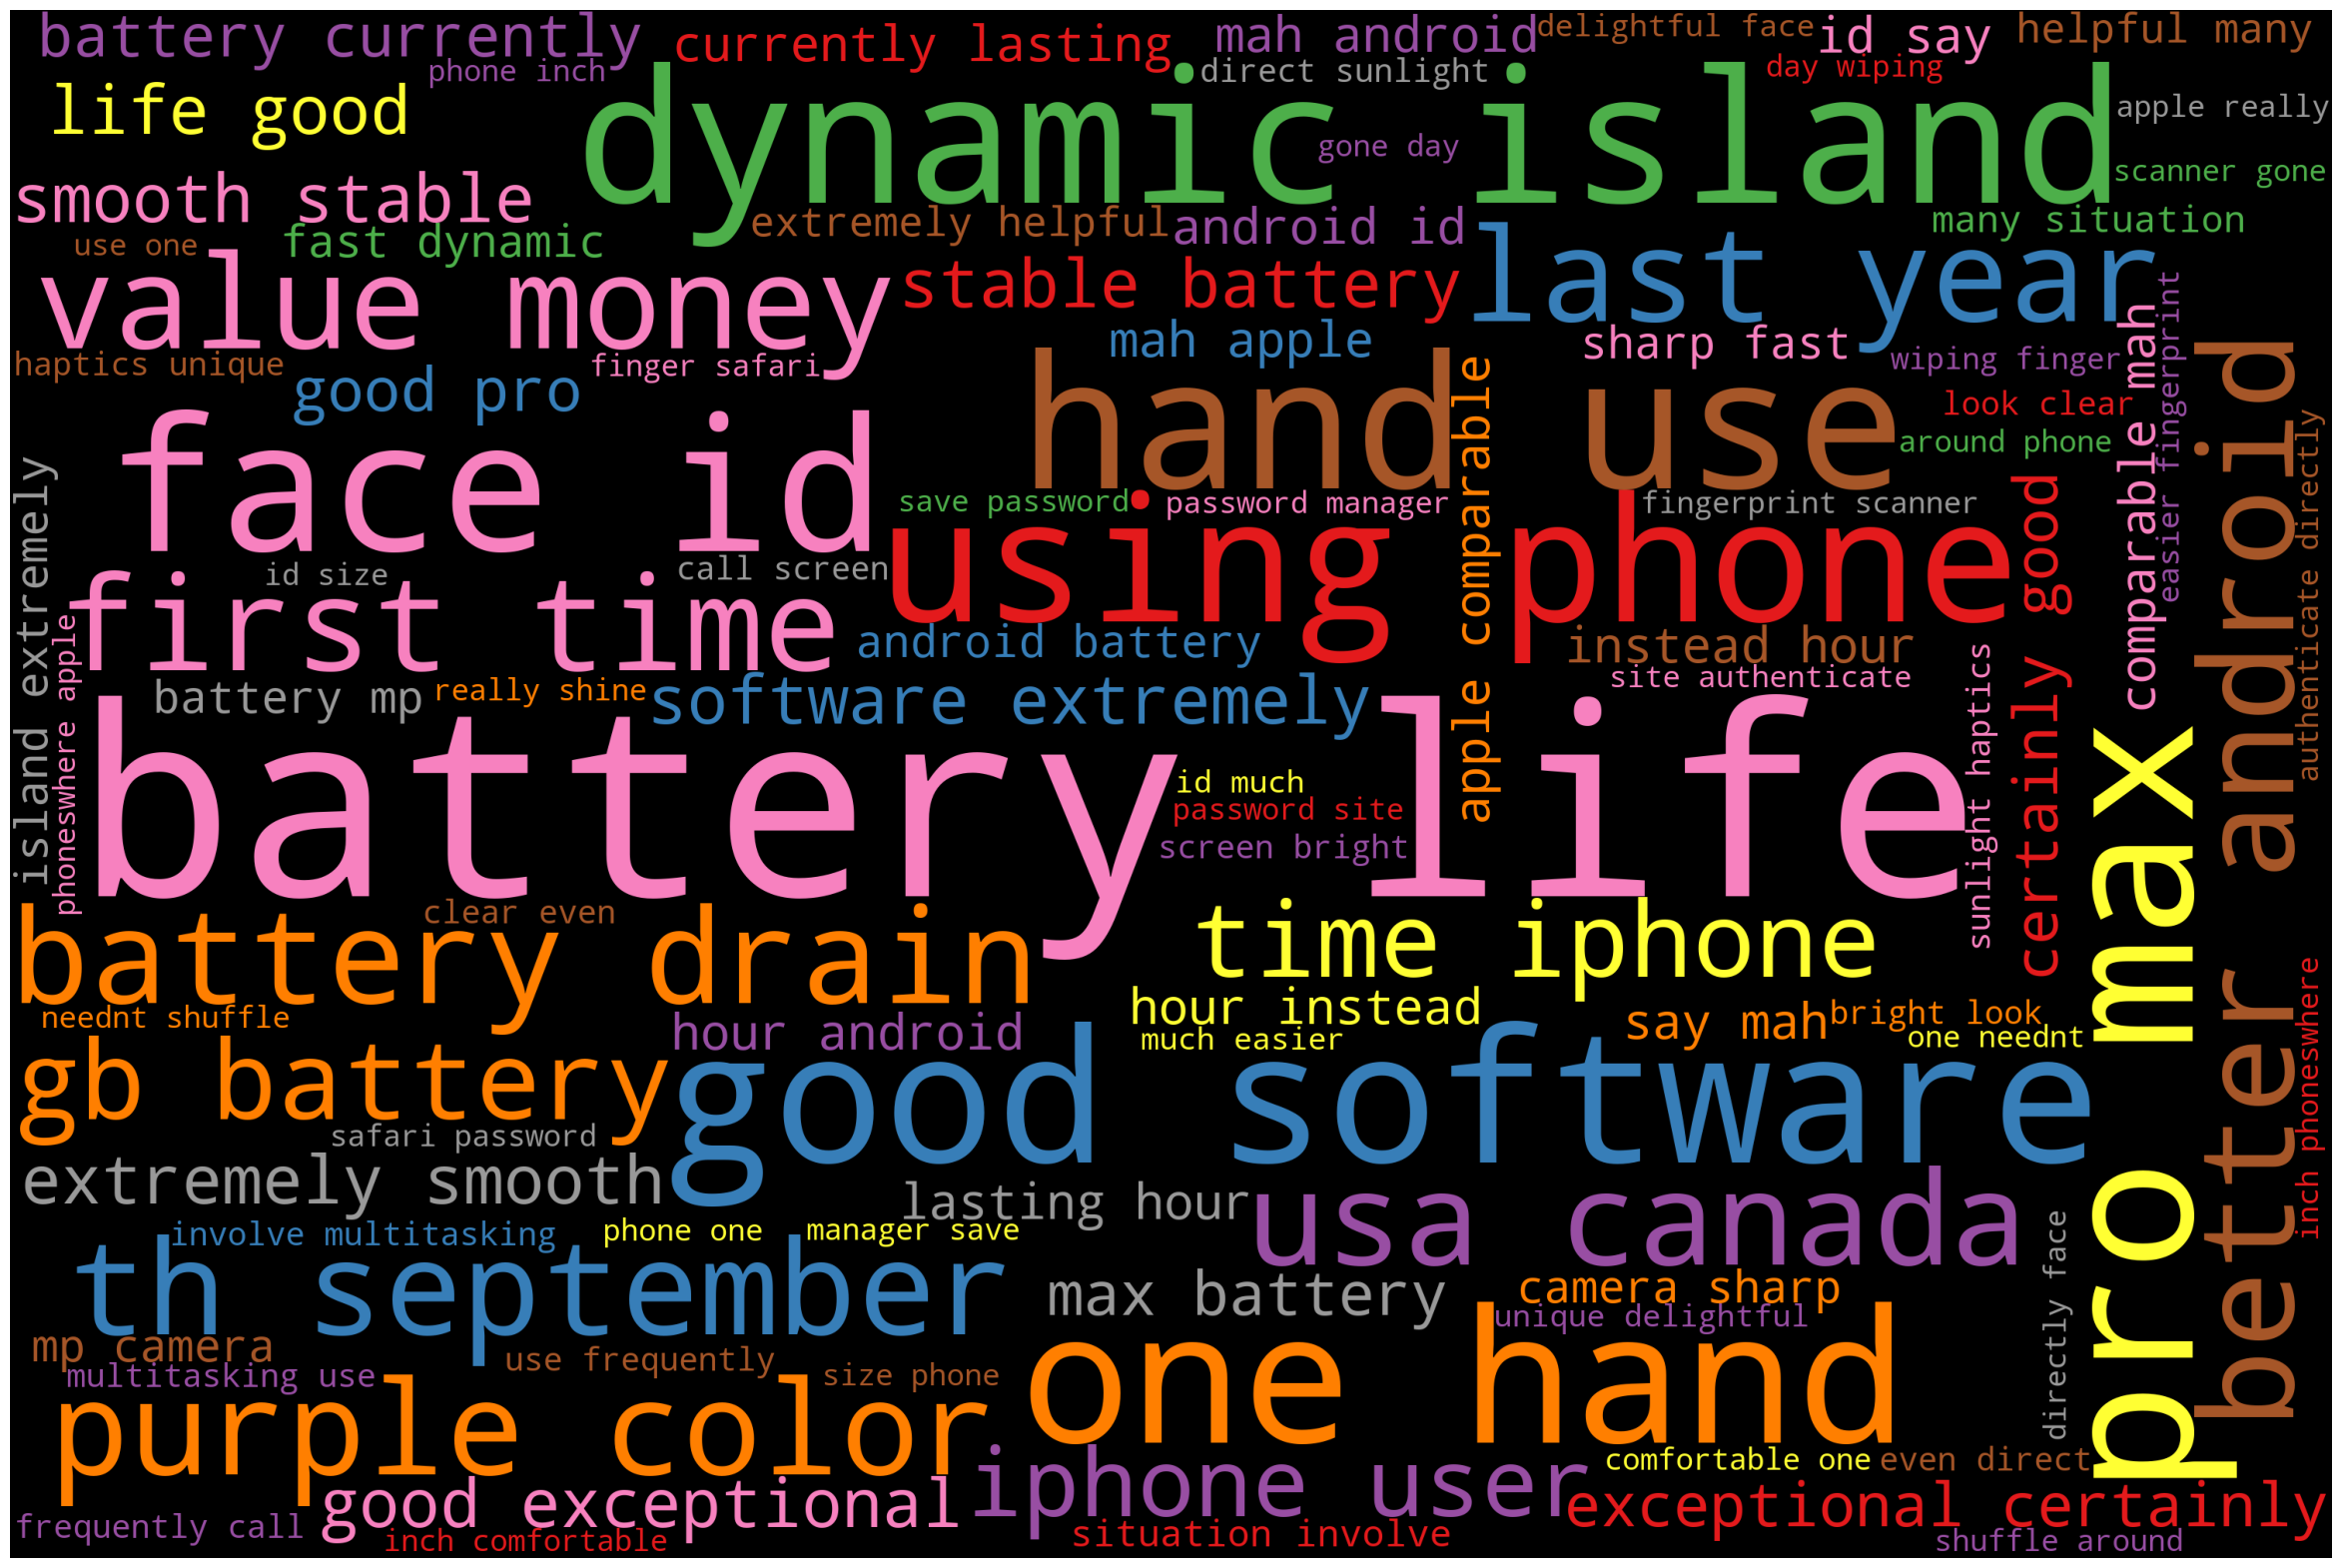

In [211]:
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_review)
plot_cloud(wordcloud)

In [206]:
with open ("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\NLP\\positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]
pos_text=" ".join([word for word in df if not word  in positive_words])

In [207]:
with open ("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\NLP\\negative-words.txt","r") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:] 
neg_text=" ".join([word for word in df if not word in negative_words])

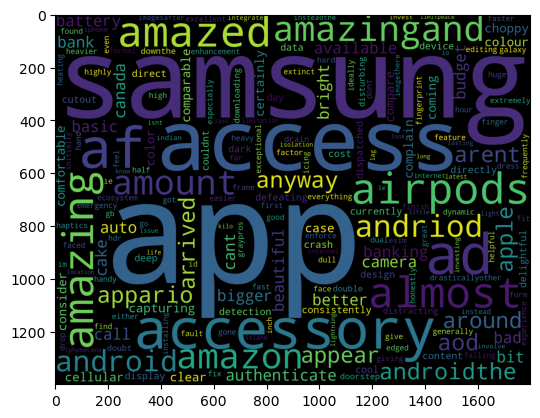

In [208]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

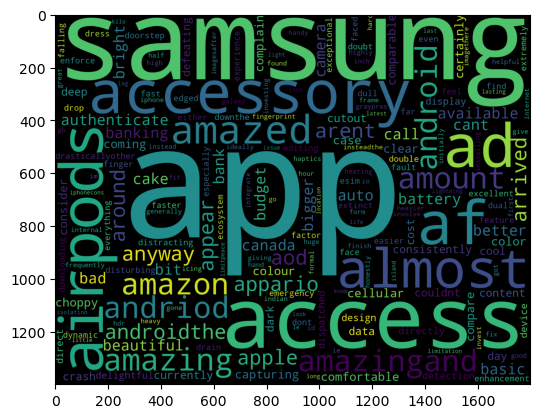

In [209]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

# Named entity recognition

In [213]:
import spacy

In [214]:
nlp = spacy.load("en_core_web_md")
one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

# Sentiment analysis

In [239]:
clean_text=pd.DataFrame(review['review'])
clean_text

,review
0,\nThe Good: The software is extremely smooth a...
1,"\nAs a Techie, I couldn't resist the latest Te..."
2,\nAll good but the picture quality gets worse ...
3,\nI was in doubt before investing such a huge ...
4,\nI think battery should be better\n
...,...
215,\nI have purchased it on 9 Nov 22 and got it o...
216,"\nBattery life, design & great looks\n"
217,\nIphone is just amazing.....and I just love t...
218,


# Sentiment analysis for Textblob

In [240]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(tweet):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [242]:
clean_text['Polarity'] = clean_text['review'].apply(getPolarity) 
clean_text['Analysis'] = clean_text['Polarity'].apply(analysis)
clean_text.head(100)

,review,Polarity,Analysis
0,\nThe Good: The software is extremely smooth a...,0.189079,Positive
1,"\nAs a Techie, I couldn't resist the latest Te...",0.202976,Positive
2,\nAll good but the picture quality gets worse ...,0.266667,Positive
3,\nI was in doubt before investing such a huge ...,0.281753,Positive
4,\nI think battery should be better\n,0.500000,Positive
...,...,...,...
95,\nI have purchased it on 9 Nov 22 and got it o...,0.750000,Positive
96,"\nBattery life, design & great looks\n",0.800000,Positive
97,\nIphone is just amazing.....and I just love t...,0.554688,Positive
98,,0.000000,Neutral


In [243]:
clean_text['Analysis'].value_counts()

Positive    198
Neutral      22
Name: Analysis, dtype: int64

# Sentiment analysis using afinn

In [244]:
clean_text1=pd.DataFrame(review['review'])
clean_text1

,review
0,\nThe Good: The software is extremely smooth a...
1,"\nAs a Techie, I couldn't resist the latest Te..."
2,\nAll good but the picture quality gets worse ...
3,\nI was in doubt before investing such a huge ...
4,\nI think battery should be better\n
...,...
215,\nI have purchased it on 9 Nov 22 and got it o...
216,"\nBattery life, design & great looks\n"
217,\nIphone is just amazing.....and I just love t...
218,


In [245]:
from afinn import Afinn
afn = Afinn()

In [246]:
def af_score(tweet):
    af=Afinn()
    return af.score(tweet)
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
        

In [248]:
clean_text1['score'] = clean_text1['review'].apply(af_score)
clean_text1['Analysis'] = clean_text1['score'].apply(analysis)

In [249]:
clean_text1

,review,score,Analysis
0,\nThe Good: The software is extremely smooth a...,31.0,Positive
1,"\nAs a Techie, I couldn't resist the latest Te...",6.0,Positive
2,\nAll good but the picture quality gets worse ...,4.0,Positive
3,\nI was in doubt before investing such a huge ...,25.0,Positive
4,\nI think battery should be better\n,2.0,Positive
...,...,...,...
215,\nI have purchased it on 9 Nov 22 and got it o...,3.0,Positive
216,"\nBattery life, design & great looks\n",3.0,Positive
217,\nIphone is just amazing.....and I just love t...,14.0,Positive
218,,0.0,Neutral


In [250]:
clean_text1['Analysis'].value_counts()

Positive    198
Neutral      22
Name: Analysis, dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

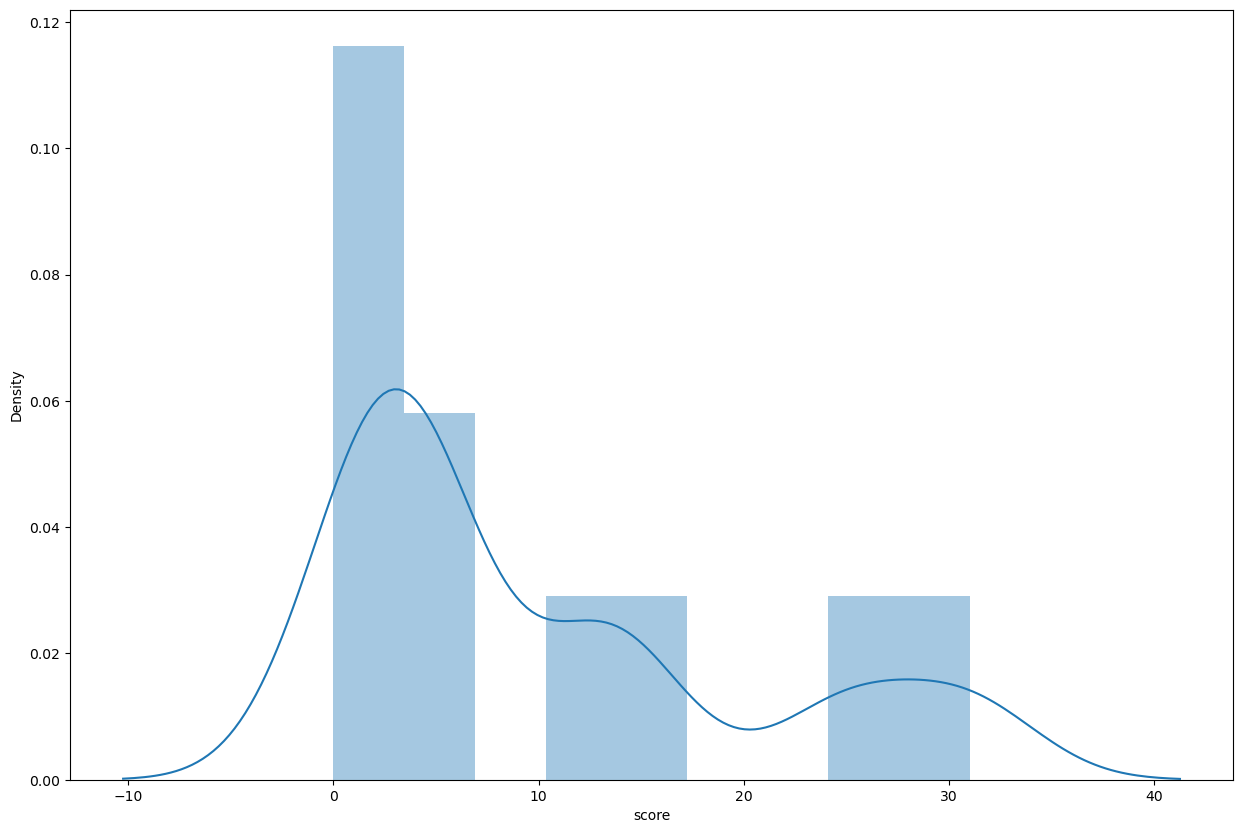

In [251]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(clean_text1['score'])

In [252]:
# Adding index cloumn
clean_text1['index']=range(0,len(clean_text1))
clean_text1

,review,score,Analysis,index
0,\nThe Good: The software is extremely smooth a...,31.0,Positive,0
1,"\nAs a Techie, I couldn't resist the latest Te...",6.0,Positive,1
2,\nAll good but the picture quality gets worse ...,4.0,Positive,2
3,\nI was in doubt before investing such a huge ...,25.0,Positive,3
4,\nI think battery should be better\n,2.0,Positive,4
...,...,...,...,...
215,\nI have purchased it on 9 Nov 22 and got it o...,3.0,Positive,215
216,"\nBattery life, design & great looks\n",3.0,Positive,216
217,\nIphone is just amazing.....and I just love t...,14.0,Positive,217
218,,0.0,Neutral,218


<AxesSubplot:xlabel='index', ylabel='score'>

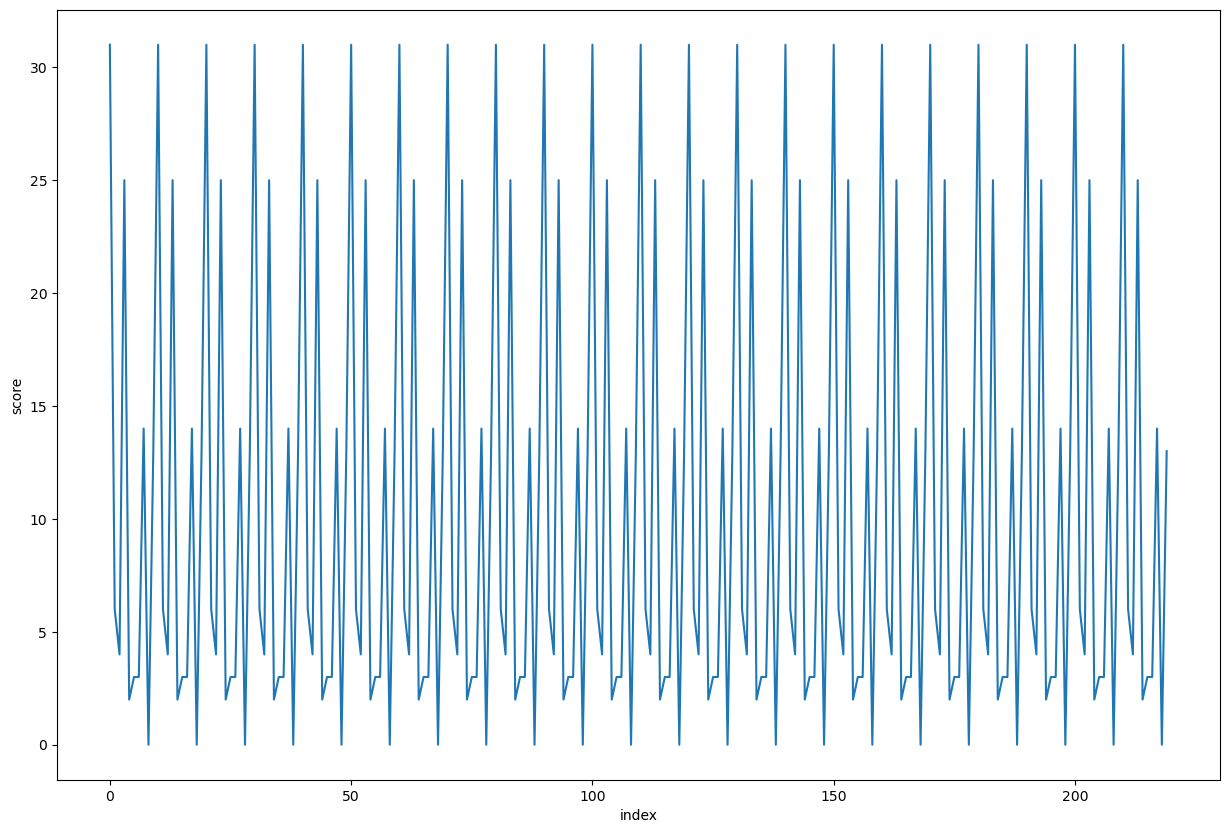

In [253]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='score',x='index',data=clean_text1)